<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/i4_0_korrel%C3%A1ci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from datetime import datetime
from datetime import timedelta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [ ]:
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"
!rm grafikon.py.*
from grafikon import grafikon

--2024-05-07 20:31:08--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5254 (5.1K) [text/plain]
Saving to: ‘grafikon.py.1’

grafikon.py.1       100%[===================>]   5.13K  --.-KB/s    in 0s      

2024-05-07 20:31:08 (45.7 MB/s) - ‘grafikon.py.1’ saved [5254/5254]



In [ ]:
drive.mount('/content/drive', readonly=True,force_remount=True )

Mounted at /content/drive


In [ ]:
user = "SL"

In [ ]:

if user=="NKF":
    path = "/content/drive/MyDrive/adatok_szakdoga/adat_jo.csv"
else:
    path = "/content/drive/MyDrive/adatok_szakdoga/adat_jo.csv"

In [ ]:
!pip install whittaker-eilers

In [ ]:
from whittaker_eilers import WhittakerSmoother

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/adatok_szakdoga/adat_jo.csv')

In [ ]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
df.set_index("Timestamp",inplace=True)

In [ ]:
df["Szum_metanol"]=df["Meleg_tartaly_szint"]+df["Hideg_tartaly_szint"]

In [ ]:
d5m= df["Szum_metanol"]

In [ ]:
a= d5m.to_numpy()

In [ ]:
smoother = WhittakerSmoother(lmbda=0.01, order=3, data_length=len(a))
results = smoother.smooth_optimal(a, break_serial_correlation=False)
optimally_smoothed_series = results.get_optimal().get_smoothed()
smoothed_szint = smoother.smooth(a)
optimal_lambda = results.get_optimal().get_lambda()

In [ ]:
optimal_lambda

0.1

In [ ]:
df['Szum_metanol_szurt'] = smoothed_szint

In [ ]:
df_2cell_szteroid_szint = df.filter(['Szum_metanol','Szum_metanol_szurt','Szteroid2_uni_rhv_hom','Szteroid2_uni2_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szintetikus3_hidr_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom'], axis=1)

<Axes: >

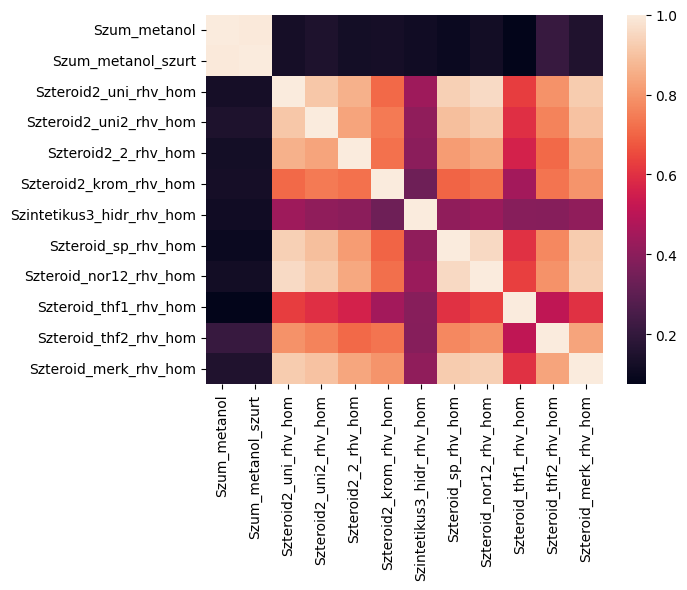

In [ ]:
import seaborn as sns
sns.heatmap(df_2cell_szteroid_szint.corr())

In [ ]:
df_2cell_szteroid_szint= df_2cell_szteroid_szint.loc['2023-01-05 07:00:00':'2023-01-06 06:00:00']

In [ ]:
d5=df_2cell_szteroid_szint

In [ ]:
d5

,Szum_metanol,Szum_metanol_szurt,Szteroid2_uni_rhv_hom,Szteroid2_uni2_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szintetikus3_hidr_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom
Timestamp,,,,,,,,,,,,
2023-01-05 07:00:00,91.368511,91.569544,18.020004,17.500000,19.210000,17.654999,18.737503,17.735000,17.605003,19.104996,17.224998,17.545006
2023-01-05 07:01:00,91.375966,91.566627,18.005005,17.515007,19.199997,17.684998,18.737503,17.759995,17.579994,19.110000,17.229996,17.585000
2023-01-05 07:02:00,91.353350,91.563545,17.985000,17.509995,19.190002,17.675003,18.737503,17.799995,17.565002,19.099998,17.229996,17.555000
2023-01-05 07:03:00,91.419178,91.560300,17.965004,17.489998,19.199997,17.680000,18.737503,17.815002,17.570000,19.104996,17.224998,17.559998
2023-01-05 07:04:00,91.593434,91.556891,17.859993,17.479996,19.199997,17.659996,18.787498,17.859993,17.585000,19.099998,17.229996,17.540000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06 05:56:00,64.470273,67.942101,18.680000,18.740005,19.290000,18.255005,18.887505,18.650002,18.245003,19.879997,18.970001,18.175003
2023-01-06 05:57:00,64.434414,67.987054,18.635002,18.720001,19.305000,18.205002,18.912498,18.729996,18.220001,19.875000,18.925003,18.180000
2023-01-06 05:58:00,64.426898,68.030665,18.620003,18.714996,19.300003,18.190002,18.900002,18.745003,18.225006,19.879997,19.095001,18.190002


In [ ]:
d5.to_csv("d5.csv")

In [ ]:
def corr(df1,df2,c1,c2):
  df1 = df1.reset_index()
  df1['tv'] = df1['Timestamp']
  df1['tk'] = df1['tv'] - timedelta(hours=6)
  df1.set_index("Timestamp",inplace=True)
  t_array = df1[["tk", "tv"]].to_numpy()
  rows_list = []
  for i in range(0, len(df1)):
    ddd= df2.loc[t_array[i,0]:t_array[i,1]]
    rows_list.append(ddd[c1].corr(ddd[c2]))
  df1['corr'] = rows_list
  grafikon(df1,"corr",c2)
  return df1

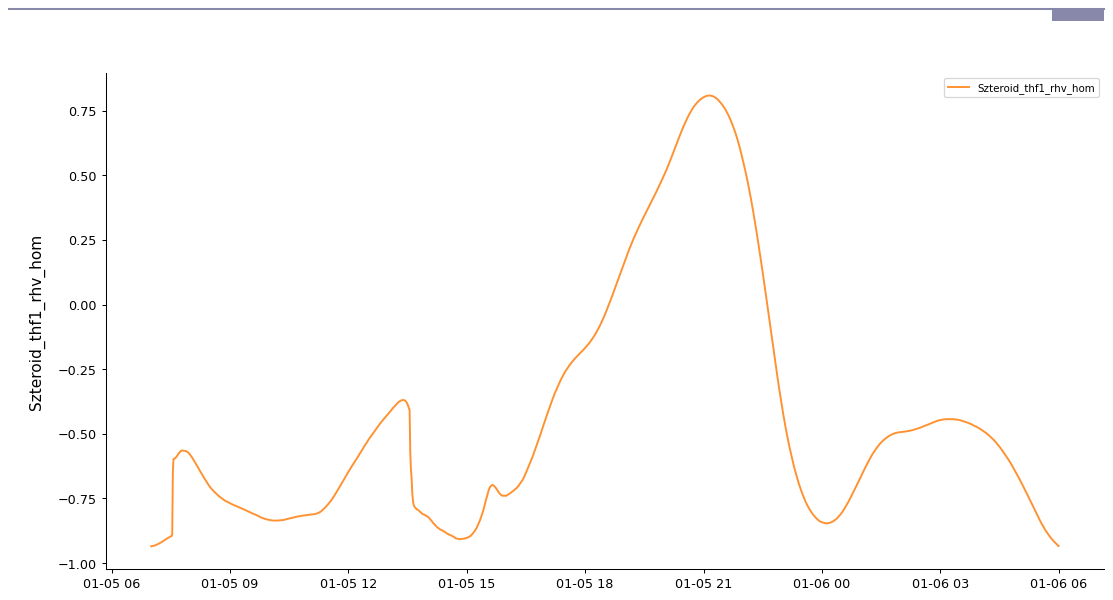

In [ ]:
df1=corr(d5,df,'Szum_metanol_szurt','Szteroid_thf1_rhv_hom')

In [ ]:
df1.head()

,Szum_metanol,Szum_metanol_szurt,Szteroid2_uni_rhv_hom,Szteroid2_uni2_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szintetikus3_hidr_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom,tv,tk,corr
Timestamp,,,,,,,,,,,,,,,
2023-01-05 07:00:00,91.368511,91.569544,18.020004,17.500000,19.210000,17.654999,18.737503,17.735000,17.605003,19.104996,17.224998,17.545006,2023-01-05 07:00:00,2023-01-05 01:00:00,-0.934965
2023-01-05 07:01:00,91.375966,91.566627,18.005005,17.515007,19.199997,17.684998,18.737503,17.759995,17.579994,19.110000,17.229996,17.585000,2023-01-05 07:01:00,2023-01-05 01:01:00,-0.934441
2023-01-05 07:02:00,91.353350,91.563545,17.985000,17.509995,19.190002,17.675003,18.737503,17.799995,17.565002,19.099998,17.229996,17.555000,2023-01-05 07:02:00,2023-01-05 01:02:00,-0.933986
2023-01-05 07:03:00,91.419178,91.560300,17.965004,17.489998,19.199997,17.680000,18.737503,17.815002,17.570000,19.104996,17.224998,17.559998,2023-01-05 07:03:00,2023-01-05 01:03:00,-0.933474
2023-01-05 07:04:00,91.593434,91.556891,17.859993,17.479996,19.199997,17.659996,18.787498,17.859993,17.585000,19.099998,17.229996,17.540000,2023-01-05 07:04:00,2023-01-05 01:04:00,-0.932942


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

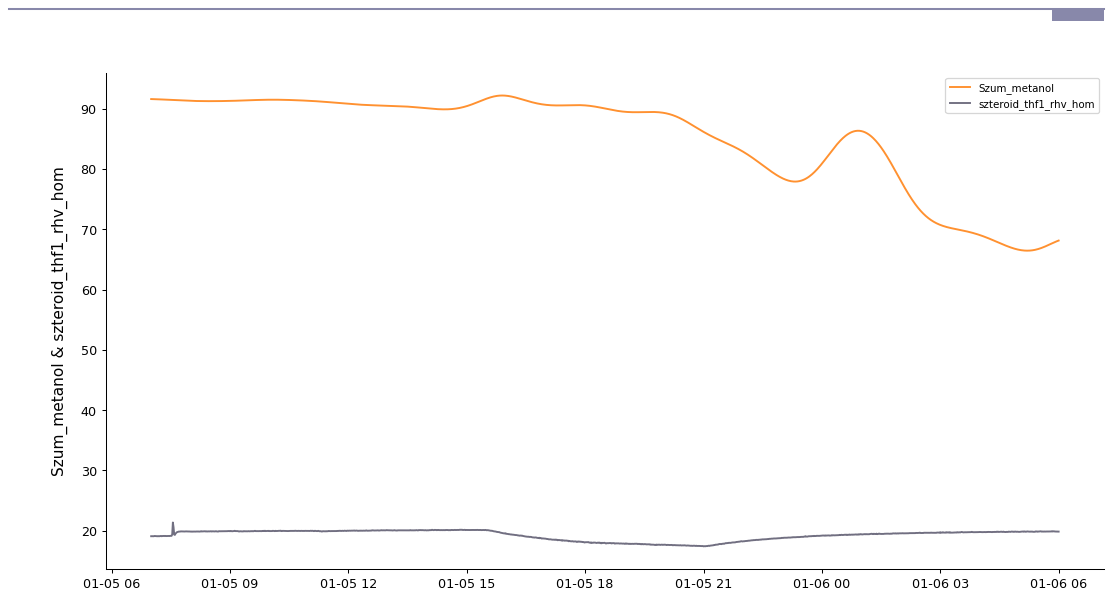

In [ ]:
grafikon(d5,'Szum_metanol_szurt','Szum_metanol','Szteroid_thf1_rhv_hom',"szteroid_thf1_rhv_hom",n_graf=2)

In [ ]:
d5 = d5.reset_index()

In [ ]:
d5['tk'] = d5['Timestamp']

In [ ]:
d5['tv'] = d5['tk'] + timedelta(hours=2)

In [ ]:
d5.set_index("Timestamp",inplace=True)

In [ ]:
d5

,Szum_metanol,Szteroid2_uni_rhv_hom,Szteroid2_uni2_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szintetikus3_hidr_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom,tk,tv
Timestamp,,,,,,,,,,,,,
2023-01-05 10:00:00,91.459700,18.290000,21.625000,19.279999,17.759995,19.125000,18.120003,17.715004,19.954994,17.295006,17.640000,2023-01-05 10:00:00,2023-01-05 12:00:00
2023-01-05 10:01:00,91.425767,18.294998,21.695000,19.330002,17.769997,19.150002,18.165000,17.720001,19.954994,17.305000,17.654999,2023-01-05 10:01:00,2023-01-05 12:01:00
2023-01-05 10:02:00,91.413895,18.285004,21.645004,19.279999,17.765007,19.150002,18.135002,17.735000,19.950005,17.284996,17.620003,2023-01-05 10:02:00,2023-01-05 12:02:00
2023-01-05 10:03:00,91.392761,18.270004,21.620003,19.305000,17.775002,19.162498,18.135002,17.740005,19.970001,17.295006,17.650002,2023-01-05 10:03:00,2023-01-05 12:03:00
2023-01-05 10:04:00,91.388466,18.315002,21.615005,19.229996,17.775002,19.187500,18.109993,17.720001,19.960000,17.295006,17.680000,2023-01-05 10:04:00,2023-01-05 12:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06 05:56:00,64.470273,18.680000,18.740005,19.290000,18.255005,18.887505,18.650002,18.245003,19.879997,18.970001,18.175003,2023-01-06 05:56:00,2023-01-06 07:56:00
2023-01-06 05:57:00,64.434414,18.635002,18.720001,19.305000,18.205002,18.912498,18.729996,18.220001,19.875000,18.925003,18.180000,2023-01-06 05:57:00,2023-01-06 07:57:00
2023-01-06 05:58:00,64.426898,18.620003,18.714996,19.300003,18.190002,18.900002,18.745003,18.225006,19.879997,19.095001,18.190002,2023-01-06 05:58:00,2023-01-06 07:58:00


In [ ]:
 t_array = d5[["tk", "tv"]].to_numpy()


In [ ]:
 t_array

array([['2023-01-05T10:00:00.000000000', '2023-01-05T12:00:00.000000000'],
       ['2023-01-05T10:01:00.000000000', '2023-01-05T12:01:00.000000000'],
       ['2023-01-05T10:02:00.000000000', '2023-01-05T12:02:00.000000000'],
       ...,
       ['2023-01-06T05:58:00.000000000', '2023-01-06T07:58:00.000000000'],
       ['2023-01-06T05:59:00.000000000', '2023-01-06T07:59:00.000000000'],
       ['2023-01-06T06:00:00.000000000', '2023-01-06T08:00:00.000000000']],
      dtype='datetime64[ns]')

In [ ]:
rows_list = []
for i in range(0, len(d5)):
    ddd= df.loc[t_array[i,0]:t_array[i,1]]
    rows_list.append(ddd['Szum_metanol'].corr(ddd['Szteroid2_uni_rhv_hom']))

In [ ]:
d5['corr'] = rows_list

In [ ]:
d5

,Szum_metanol,Szteroid2_uni_rhv_hom,Szteroid2_uni2_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szintetikus3_hidr_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom,tk,tv,corr
Timestamp,,,,,,,,,,,,,,
2023-01-05 10:00:00,91.459700,18.290000,21.625000,19.279999,17.759995,19.125000,18.120003,17.715004,19.954994,17.295006,17.640000,2023-01-05 10:00:00,2023-01-05 12:00:00,0.290368
2023-01-05 10:01:00,91.425767,18.294998,21.695000,19.330002,17.769997,19.150002,18.165000,17.720001,19.954994,17.305000,17.654999,2023-01-05 10:01:00,2023-01-05 12:01:00,0.296491
2023-01-05 10:02:00,91.413895,18.285004,21.645004,19.279999,17.765007,19.150002,18.135002,17.735000,19.950005,17.284996,17.620003,2023-01-05 10:02:00,2023-01-05 12:02:00,0.301814
2023-01-05 10:03:00,91.392761,18.270004,21.620003,19.305000,17.775002,19.162498,18.135002,17.740005,19.970001,17.295006,17.650002,2023-01-05 10:03:00,2023-01-05 12:03:00,0.314138
2023-01-05 10:04:00,91.388466,18.315002,21.615005,19.229996,17.775002,19.187500,18.109993,17.720001,19.960000,17.295006,17.680000,2023-01-05 10:04:00,2023-01-05 12:04:00,0.335652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06 05:56:00,64.470273,18.680000,18.740005,19.290000,18.255005,18.887505,18.650002,18.245003,19.879997,18.970001,18.175003,2023-01-06 05:56:00,2023-01-06 07:56:00,0.818154
2023-01-06 05:57:00,64.434414,18.635002,18.720001,19.305000,18.205002,18.912498,18.729996,18.220001,19.875000,18.925003,18.180000,2023-01-06 05:57:00,2023-01-06 07:57:00,0.835143
2023-01-06 05:58:00,64.426898,18.620003,18.714996,19.300003,18.190002,18.900002,18.745003,18.225006,19.879997,19.095001,18.190002,2023-01-06 05:58:00,2023-01-06 07:58:00,0.850878


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

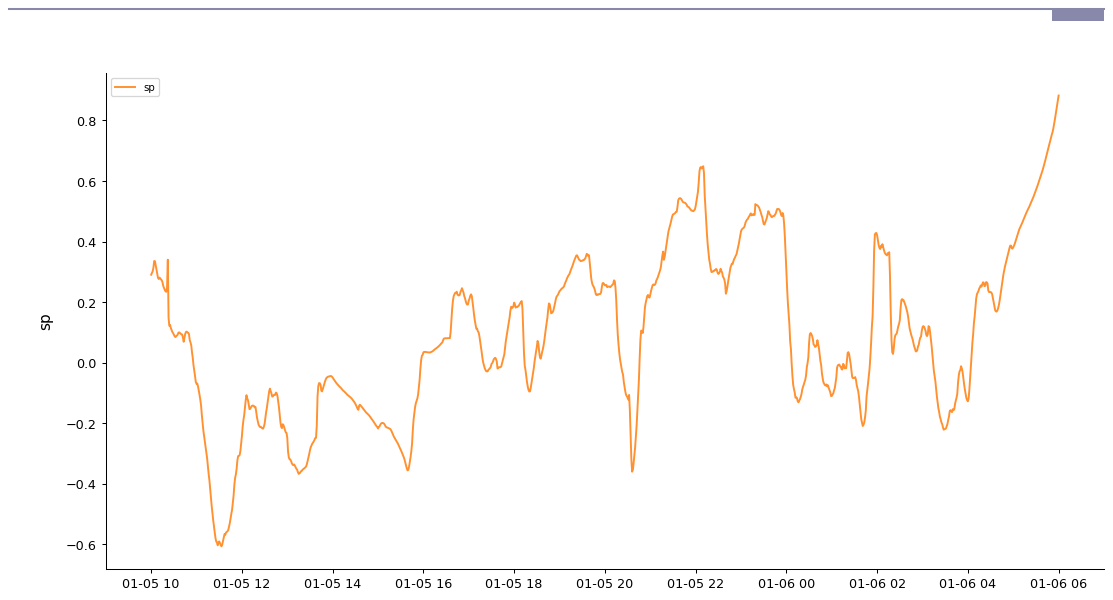

In [ ]:
grafikon(d5,"corr","sp")